In [ ]:
from OpenQuakeUHS.core.folder_classifier import classify_csv_files
from OpenQuakeUHS.tools.uhs_plotter import plot_uhs_sets


from OpenQuakeUHS.core.spectrum_parser import UHSSpectrum
from OpenQuakeUHS.tools.uhs_table import generate_uhs_table


from OpenQuakeUHS.core.hazard_classifier import classify_hazard_files
from OpenQuakeUHS.tools.hazard_plotter import plot_mean_and_rlz_hazard_curves


import os


## All UHS

In [ ]:
poe_values=0.2
poe=0.02
# 0.687 , 0.50 , 0.2 , 0.1 , 0.02 

In [ ]:
SVG_path=r'C:\Users\ppala\OneDrive\01. Brain\01. Consultorias\071. Amenaza Clinica Mosquera\01. SeismicHazard PSHA\imagesSVG'

In [ ]:
# mean, rlz, quantile = classify_csv_files(r"data\uhs")
mean, rlz, quantile = classify_csv_files(r'C:\Users\ppala\OneDrive\01. Brain\01. Consultorias\071. Amenaza Clinica Mosquera\01. SeismicHazard PSHA\data\uhs')


plot_uhs_sets(
    mean_files=mean,
    quantile_files=quantile,
    rlz_files=None,
    poe=[0.687 , 0.1 , 0.02 ],
    title="Site UHS",
    save_path = os.path.join(SVG_path, "UHS"),
)

In [ ]:
plot_uhs_sets(
    mean_files=mean,
    quantile_files=None,
    rlz_files=None,
    poe=[0.687 , 0.1 , 0.02],
    title="Site UHS"
)

In [ ]:

table = generate_uhs_table(mean[0], quantile, poe=0.687)
print(table)

## UHS

In [ ]:
uhs = UHSSpectrum(mean[0])
uhs.plot(poe=poe)

## Hazard Curves

In [ ]:
# mean_hc, rlz_hc, quantile_hc = classify_hazard_files(r"data\hazard_curves")
mean_hc, rlz_hc, quantile_hc = classify_hazard_files(r'C:\Users\ppala\OneDrive\01. Brain\01. Consultorias\071. Amenaza Clinica Mosquera\01. SeismicHazard PSHA\data\hazard_curves')
plot_mean_and_rlz_hazard_curves(mean_files=mean_hc, 
                                rlz_files=None, 
                                periods=[0.01 , 0.2 ,0.50, 1.0 , 1.5 , 2.0 , 3.0] ,
                                reference_value=[0.687 , 0.1 , 0.02], 
                                 save_path = os.path.join(SVG_path, "HC"), 
                                  )
# plot_mean_and_rlz_hazard_curves(mean_files=mean_hc, rlz_files=None, periods=[0.01 , 0.05, 0.075, 0.10, 0.15,  0.2 , 0.25, 0.30, 0.40, 0.50, 0.60,  0.75 , 1.0 ,1.25,  1.5 , 2.0 , 3.0, 4, 5] , reference_value=0.1)

# plot_mean_and_rlz_hazard_curves(mean_files=mean_hc, rlz_files=None, periods=[0.01 , 0.1, 0.2, 0.5 ,1 ,2,3])
# plot_mean_and_rlz_hazard_curves(mean_files=mean_hc, rlz_files=None, periods=[0.01 , 0.1, 0.2 , 0.5 , 1 ], reference_value=0.1)

## Disaggregation

C:\Users\ppala\OneDrive\01. Brain\11. GitHub\OpenQuakeUHS\src\OpenQuakeUHS\core\disaggregation_calculator.py:60: FutureWarning: The provided callable <function sum at 0x0000018CCF011480> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  d01 = data01.pivot_table(values='hz_cont', index=['mag','dist'], columns='eps', aggfunc=np.sum, fill_value=0).reset_index()


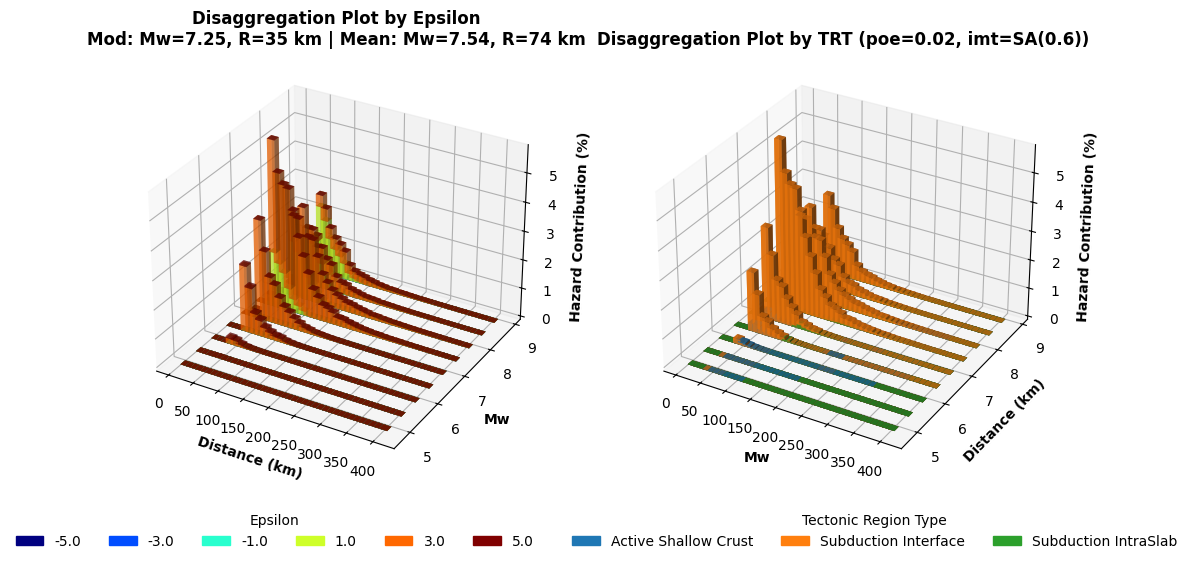

In [1]:
from OpenQuakeUHS.core.disaggregation_calculator import Disaggregation
base_path = r'C:\Users\ppala\OneDrive\01. Brain\06. PeligroSismico\03. PalaciosBrain\07. OQ Models\Area_Faults_43TR_M\OQ_Outputs'
target_poe=0.02
target_imt='SA(0.6)'

Disaggregation(base_path , target_poe , target_imt)

## Maps

In [ ]:
from IPython.display import display
from OpenQuakeUHS.tools.map_utils import plot_uhs_location_map

# Asumiendo que ya tienes instanciado un objeto `uhs` de tipo `UHSSpectrum`
mapa = plot_uhs_location_map(lat=uhs.latitude, lon=uhs.longitude)
display(mapa)

print(uhs.latitude , uhs.longitude)
